# PROBLEMA DE CLASIFICACIÓN SUPERVISADA
## TARGET - VARIABLE :
“¿Terminó comprando una póliza con nosotros?” (codificada como 0 = No compra, 1 = Sí compra)


**Modelos predictivos supervisados que podemos trabajar:**

**Regresión logística**

- Modelo base y muy interpretativo.
- Nos permite estimar la probabilidad de compra en función de las variables explicativas (edad, sexo, ocupación, tipo de vehículo, motivos, etc.).
- Ventaja: de facil explicacion en un contexto academico.


**Árboles de decisión (Decision Tree)**

- Clasifica a los clientes según reglas claras (ejemplo: edad > 30 y vehículo = nuevo → mayor probabilidad de compra).
- Ventaja: muy visual y útil para presentaciones ejecutivas.


**Random Forest**

- Conjunto de múltiples árboles de decisión.
- Mejora la precisión y reduce el riesgo de sobreajuste.
- Ventaja: robusto y maneja bien variables categóricas codificadas como dummies.

*¿Que es una variable dummy?*
Una variable dummy convierte una categoría en un valor binario.
Los hemos usado en nuestro dataset porque los modelos matemáticos y de machine learning trabajan mejor con números que con texto.

In [33]:
#Trabajando con Python y scikit-learn

# 1. Importar librerías
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report, roc_auc_score
import matplotlib.pyplot as plt

In [34]:
# 2. Cargamos el dataset
df = pd.read_csv("data/seguros_mixto.csv")

In [35]:
print(df.columns.tolist())


['12. ¿Ha solicitado información sobre pólizas anteriormente?', '1. Edad:', '6. Tipo de vehículo que posee:', '5. ¿Qué tan fácil fue contactarnos?', '9. ¿Qué cobertura le interesa más en un seguro vehicular? (Puede marcar más de una opción) - Abastecimiento de combustible', '9. ¿Qué cobertura le interesa más en un seguro vehicular? (Puede marcar más de una opción) - Robos al paso', '4. ¿Cómo nos conoció?', '7. Uso principal del vehículo', '14. ¿Cuál fue el principal motivo para no adquirir la póliza? - Aún no cuento con un auto', '14. ¿Cuál fue el principal motivo para no adquirir la póliza? - No era el momento adecuado', '9. ¿Qué cobertura le interesa más en un seguro vehicular? (Puede marcar más de una opción) - Daños propio', '9. ¿Qué cobertura le interesa más en un seguro vehicular? (Puede marcar más de una opción) - Asistencia mecánica', '2. Sexo:', '9. ¿Qué cobertura le interesa más en un seguro vehicular? (Puede marcar más de una opción) - No tengo auto', '9. ¿Qué cobertura le i

In [36]:
df["target_binaria"] = df["13. ¿Terminó comprando una póliza con nosotros?"].replace({
    3: 1,  # Sí
    1: 1,  # Interesada
    2: 0,  # No interesado
    0: 0   # Vacío
})

# Verificación rápida
print(df["target_binaria"].value_counts())


target_binaria
1    65
0    17
Name: count, dtype: int64


In [37]:
X = df.drop(columns=["target_binaria"])
y = df["target_binaria"]


In [38]:
# 4. Separamos para el entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

In [39]:
#Entrenamiento de modelos
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

log_model = LogisticRegression(max_iter=1000, random_state=42)
rf_model = RandomForestClassifier(random_state=42)

log_model.fit(X_train, y_train)
rf_model.fit(X_train, y_train)


,"n_estimators n_estimators: int, default=100The number of trees in the forest... versionchanged:: 0.22 The default value of ``n_estimators`` changed from 10 to 100 in 0.22.",100
,"criterion criterion: {""gini"", ""entropy"", ""log_loss""}, default=""gini""The function to measure the quality of a split. Supported criteria are""gini"" for the Gini impurity and ""log_loss"" and ""entropy"" both for theShannon information gain, see :ref:`tree_mathematical_formulation`.Note: This parameter is tree-specific.",'gini'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",None
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: {""sqrt"", ""log2"", None}, int or float, default=""sqrt""The number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None, then `max_features=n_features`... versionchanged:: 1.1 The default of `max_features` changed from `""auto""` to `""sqrt""`.Note: the search for a split does not stop until at least onevalid partition of the node samples is found, even if it requires toeffectively inspect more than ``max_features`` features.",'sqrt'
,"max_leaf_nodes max_leaf_nodes: int, default=NoneGrow trees with ``max_leaf_nodes`` in best-first fashion.Best nodes are defined as relative reduction in impurity.If None then unlimited number of leaf nodes.",None
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsamples at the current node, ``N_t_L`` is the number of samples in theleft child, and ``N_t_R`` is the number of samples in the right child.``N``, ``N_t``, ``N_t_R`` and ``N_t_L`` all refer to the weighted sum,if ``sample_weight`` is passed... versionadded:: 0.19",0.0
,"bootstrap bootstrap: bool, default=TrueWhether bootstrap samples are used when building trees. If False, thewhole dataset is used to build each tree.",True
,"oob_score oob_score: bool or callable, default=FalseWhether to use out-of-bag samples to estimate the generalization score.By default, :func:`~sklearn.metrics.accuracy_score` is used.Provide a callable with signature `metric

In [40]:
print(y_test.unique())


[1 0]


# RESULTADOS DE EVALUACION DE DESEMPEÑO

- Matriz de confusión → para ver aciertos y errores en clasificación.

- Reporte de clasificación → precisión, recall y F1-score.

- ROC-AUC → calidad del modelo en distinguir entre positivos y negativos.

- Gráfico de importancia de variables → qué factores influyen más en la predicción.

In [41]:
#Evaluamos desempeño
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

for model, name in [(log_model, "Logistic Regression"), (rf_model, "Random Forest")]:
    y_pred = model.predict(X_test)
    print(f"\n{name}")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print("ROC-AUC:", roc_auc_score(y_test, model.predict_proba(X_test)[:,1]))



Logistic Regression
[[ 0  5]
 [ 3 17]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         5
           1       0.77      0.85      0.81        20

    accuracy                           0.68        25
   macro avg       0.39      0.42      0.40        25
weighted avg       0.62      0.68      0.65        25

ROC-AUC: 0.38

Random Forest
[[ 2  3]
 [ 0 20]]
              precision    recall  f1-score   support

           0       1.00      0.40      0.57         5
           1       0.87      1.00      0.93        20

    accuracy                           0.88        25
   macro avg       0.93      0.70      0.75        25
weighted avg       0.90      0.88      0.86        25

ROC-AUC: 0.93


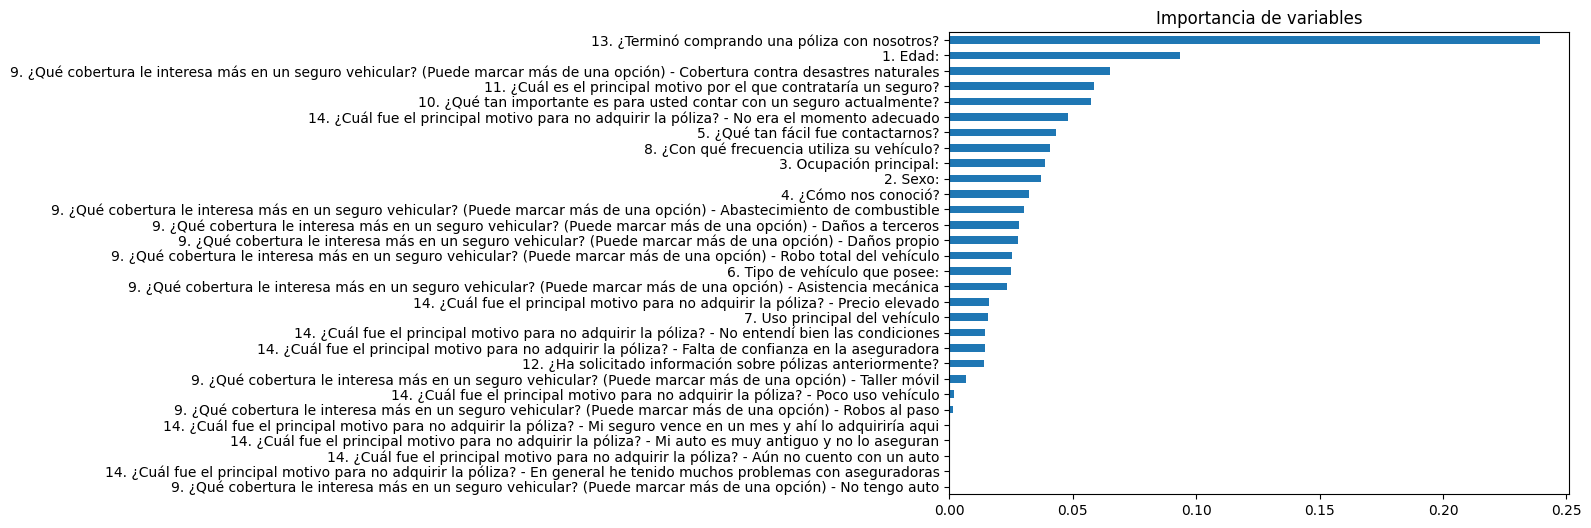

In [42]:
#Visualización e importancia - Random Forest

import pandas as pd
import matplotlib.pyplot as plt

importances = pd.Series(rf_model.feature_importances_, index=X.columns)
importances.sort_values().plot(kind="barh", figsize=(8,6))
plt.title("Importancia de variables")
plt.show()


#Comparación grafica de las curvas ROC en ambos modelos
- Una curva ROC para cada modelo en el mismo gráfico.

- El AUC de cada modelo mostrado en la leyenda.

- Una línea diagonal de referencia (clasificación aleatoria).

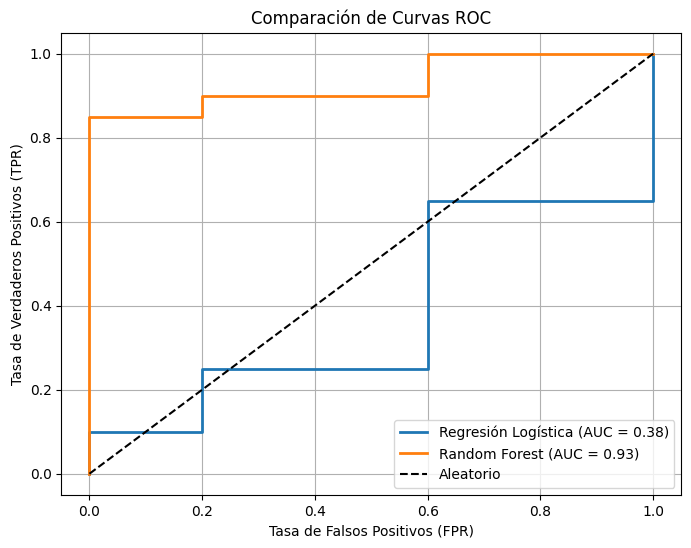

In [43]:
#========================================================
#Comparación grafica de las curvas ROC en ambos modelos
#========================================================

from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Probabilidades de cada modelo
log_probs = log_model.predict_proba(X_test)[:, 1]
rf_probs = rf_model.predict_proba(X_test)[:, 1]

# Curvas ROC
fpr_log, tpr_log, _ = roc_curve(y_test, log_probs)
fpr_rf, tpr_rf, _ = roc_curve(y_test, rf_probs)

# AUC
auc_log = roc_auc_score(y_test, log_probs)
auc_rf = roc_auc_score(y_test, rf_probs)

# Gráfico comparativo
plt.figure(figsize=(8, 6))
plt.plot(fpr_log, tpr_log, label=f'Regresión Logística (AUC = {auc_log:.2f})', linewidth=2)
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC = {auc_rf:.2f})', linewidth=2)
plt.plot([0, 1], [0, 1], 'k--', label='Aleatorio')
plt.xlabel('Tasa de Falsos Positivos (FPR)')
plt.ylabel('Tasa de Verdaderos Positivos (TPR)')
plt.title('Comparación de Curvas ROC')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


#CONCLUSIONES Y RECOMENDACIONES

**Conclusiones**
- El modelo nos permite segmentar perfiles con mayor probabilidad de compra.

- Se pueden focalizar campañas comerciales en clientes interesados o con características similares a los compradores.

- La documentación es reproducible asegura que el proceso pueda ser auditado y replicado.

- Haber aplicado las métricas (ROC-AUC, F1, matriz de confusión) respalda la confiabilidad del modelo.


**Recomendaciones estratégicas**

- Aplicar el modelo como herramienta de apoyo en las campañas de seguros vehiculares.

- Priorizar las variables más influyentes en el despliegue comercial.

- Continuar alimentando el dataset con nuevas encuestas o datos transaccionales, previamente validando las encuestas para medir su confiabilidad.

- Mantener dashboards interactivos para el monitoreo de resultados en tiempo real.

# SIMULACION CON CLIENTES NUEVOS

In [44]:
cliente_prueba = X_test.iloc[[3]]
pred = model.predict(cliente_prueba)[0]
prob = model.predict_proba(cliente_prueba)[0][1]

print("¿Compra seguro?:", "Sí" if pred==1 else "No")
print(f"Probabilidad de compra: {prob:.2f}")

¿Compra seguro?: Sí
Probabilidad de compra: 0.86
